## Here we are specifically using EMNIST letter dataset. So Let's get started

In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#/kaggle/input/emnist/emnist-letters-mapping.txt
# testing_letter = pd.read_csv('../data/emnist/archive/emnist-letters-test.csv')
# training_letter = pd.read_csv('../data/emnist/archive/emnist-letters-train.csv')
testing_letter = pd.read_csv('../data/emnist/archive/emnist-digits-test.csv')
training_letter = pd.read_csv('../data/emnist/archive/emnist-digits-train.csv')

In [ ]:
print(training_letter.shape)
print(testing_letter.shape)

In [ ]:
#training_letters
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
#testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

## Let's see what type of images we have got. 

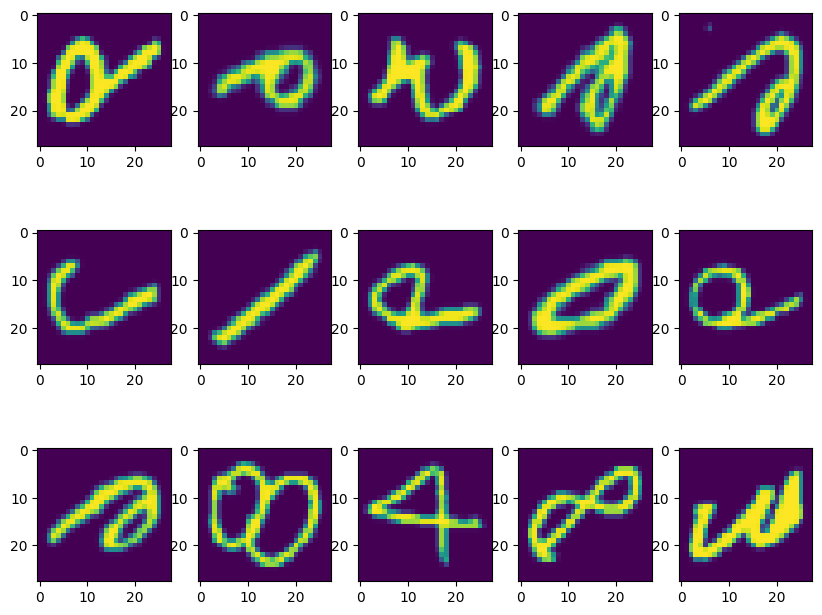

In [10]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))


In [9]:
print(x1[1])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   2   4   4   4   4   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   4   4   5  21  32  37
  37  32   7   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   1  22  46 114 125 129 172 203 217 216 202  9

In [1]:
import tensorflow as tf

2022-11-27 21:54:33.622641: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-27 21:54:33.846141: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-27 21:54:33.896956: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-27 21:54:33.896977: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

# Preprocesssing

# 1. Normalisation and reshaping of data

### Before feeding in the data to the model we will normalise and reshape the data given to us. This will decrease the complexity of the models and make the model work efficiently as less complex numbers will be there to process.

In [3]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

NameError: name 'x1' is not defined

In [11]:
# Transform labels
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

NameError: name 'tf' is not defined

# Lets create a CNN for the classification of these random images.

In [19]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D,Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [22]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [23]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

## Adding Callback API's to save best weights and change lr

In [24]:
 
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [25]:
history = model.fit(train_x,train_y,epochs=4,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/4
1499/1500 [============================>.] - ETA: 0s - loss: 0.1747 - accuracy: 0.9489
Epoch 1: val_accuracy improved from -inf to 0.98058, saving model to Best_points.h5
1500/1500 [==============================] - 36s 23ms/step - loss: 0.1746 - accuracy: 0.9490 - val_loss: 0.0740 - val_accuracy: 0.9806 - lr: 0.0010
Epoch 2/4
1498/1500 [============================>.] - ETA: 0s - loss: 0.0609 - accuracy: 0.9833
Epoch 2: val_accuracy did not improve from 0.98058
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0609 - accuracy: 0.9832 - val_loss: 0.0831 - val_accuracy: 0.9771 - lr: 0.0010
Epoch 3/4
1499/1500 [============================>.] - ETA: 0s - loss: 0.0381 - accuracy: 0.9893
Epoch 3: val_accuracy improved from 0.98058 to 0.98367, saving model to Best_points.h5
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0380 - accuracy: 0.9893 - val_loss: 0.0766 - val_accuracy: 0.9837 - lr: 0.0010
Epoch 4/4
1499/1500 [======================

In [28]:
model.save('model_emnist.h5')

## Let's plot Accuracy vs Val_Accuracy to further evaluation..

In [17]:
import seaborn as sns

In [ ]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

## Changing the test_split size to 0.15 to see if validation score increases or not

In [18]:
train_x2,test_x2,train_y2,test_y2 = train_test_split(train_images,y1,test_size=0.15,random_state = 42)

In [20]:
history1 = model.fit(train_x2,train_y2,epochs=4,validation_data=(test_x2,test_y2))

Epoch 1/4
2359/2359 [==============================] - 56s 24ms/step - loss: 0.0797 - accuracy: 0.9710 - val_loss: 0.3448 - val_accuracy: 0.9244
Epoch 2/4
2359/2359 [==============================] - 56s 24ms/step - loss: 0.0738 - accuracy: 0.9727 - val_loss: 0.3312 - val_accuracy: 0.9208
Epoch 3/4
2359/2359 [==============================] - 58s 25ms/step - loss: 0.0690 - accuracy: 0.9736 - val_loss: 0.3632 - val_accuracy: 0.9257
Epoch 4/4
2359/2359 [==============================] - 57s 24ms/step - loss: 0.0650 - accuracy: 0.9749 - val_loss: 0.3208 - val_accuracy: 0.9252


Text(0, 0.5, 'Accuray')

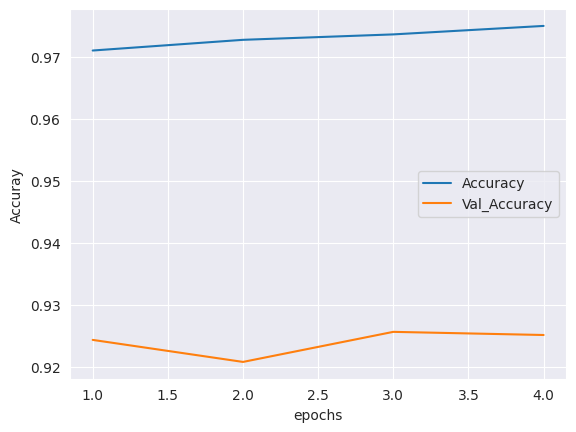

In [21]:
q = len(history1.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history1.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history1.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

In [ ]:
model.predict()

In [25]:
model.save('emnist_letters.h5')

# As the validation score score went down we won't be changing the test_split size. 
# Thus the above model is better than the latter one.

## Hope everyone who reads this notebook finds it helpful. 
## Do upvote it. Thank You🙏😃